In [1]:
using BSON: @save, @load
using Statistics, DelimitedFiles, Printf
include("../MDToolbox.jl/src/MDToolbox.jl")
using .MDToolbox
using StatsBase 

In [2]:
r_is = []
r_os = []
r_1s = []
r_2s = []
r_fis = []
r_fos = []
r_f1s = []
r_f2s = []
titles = []
qs = []
test_radii = [20, 20, 25, 30, 30]
pred_radii = [25, 30, 25, 20, 25]
test_num = 1
for i in 1:size(test_radii, 1)
    test_radius = test_radii[i]
    pred_radius = pred_radii[i]

    @load "data/01_result/test_radius_$(test_radius)_pred_radius_$(pred_radius)/statistics_$(test_num)_ids.bson" ids extracted_qs 
    @load "data/01_result/test_radius_$(test_radius)_pred_radius_$(pred_radius)/statistics_$(test_num)_params.bson" T1 T2 pi_i1 pi_i2 
    @load "data/01_result/test_radius_$(test_radius)_pred_radius_$(pred_radius)/statistics_$(test_num)_rmsds.bson" rmsds rmsds_a rmsds_b rmsds_fitted rmsds_a_fitted rmsds_b_fitted 
    @load "data/01_result/test_radius_$(test_radius)_pred_radius_$(pred_radius)/statistics_$(test_num)_rmsds_original.bson" rmsds_original rmsds_original_a rmsds_original_b rmsds_original_fitted rmsds_original_a_fitted rmsds_original_b_fitted 
    @load "data/01_result/test_radius_$(test_radius)_pred_radius_$(pred_radius)/statistics_$(test_num)_rmsds1.bson" rmsds1 rmsds1_a rmsds1_b rmsds1_fitted rmsds1_a_fitted rmsds1_b_fitted 
    @load "data/01_result/test_radius_$(test_radius)_pred_radius_$(pred_radius)/statistics_$(test_num)_rmsds2.bson" rmsds2 rmsds2_a rmsds2_b rmsds2_fitted rmsds2_a_fitted rmsds2_b_fitted
    push!(qs, extracted_qs)
    push!(r_is, rmsds)
    push!(r_os, rmsds_original)
    push!(r_1s, rmsds1)
    push!(r_2s, rmsds2)
    push!(r_fis, rmsds_fitted)
    push!(r_fos, rmsds_original_fitted)
    push!(r_f1s, rmsds1_fitted)
    push!(r_f2s, rmsds2_fitted)
    push!(titles, "test $(test_radius) pred $(pred_radius)")
end

In [3]:
using PyPlot

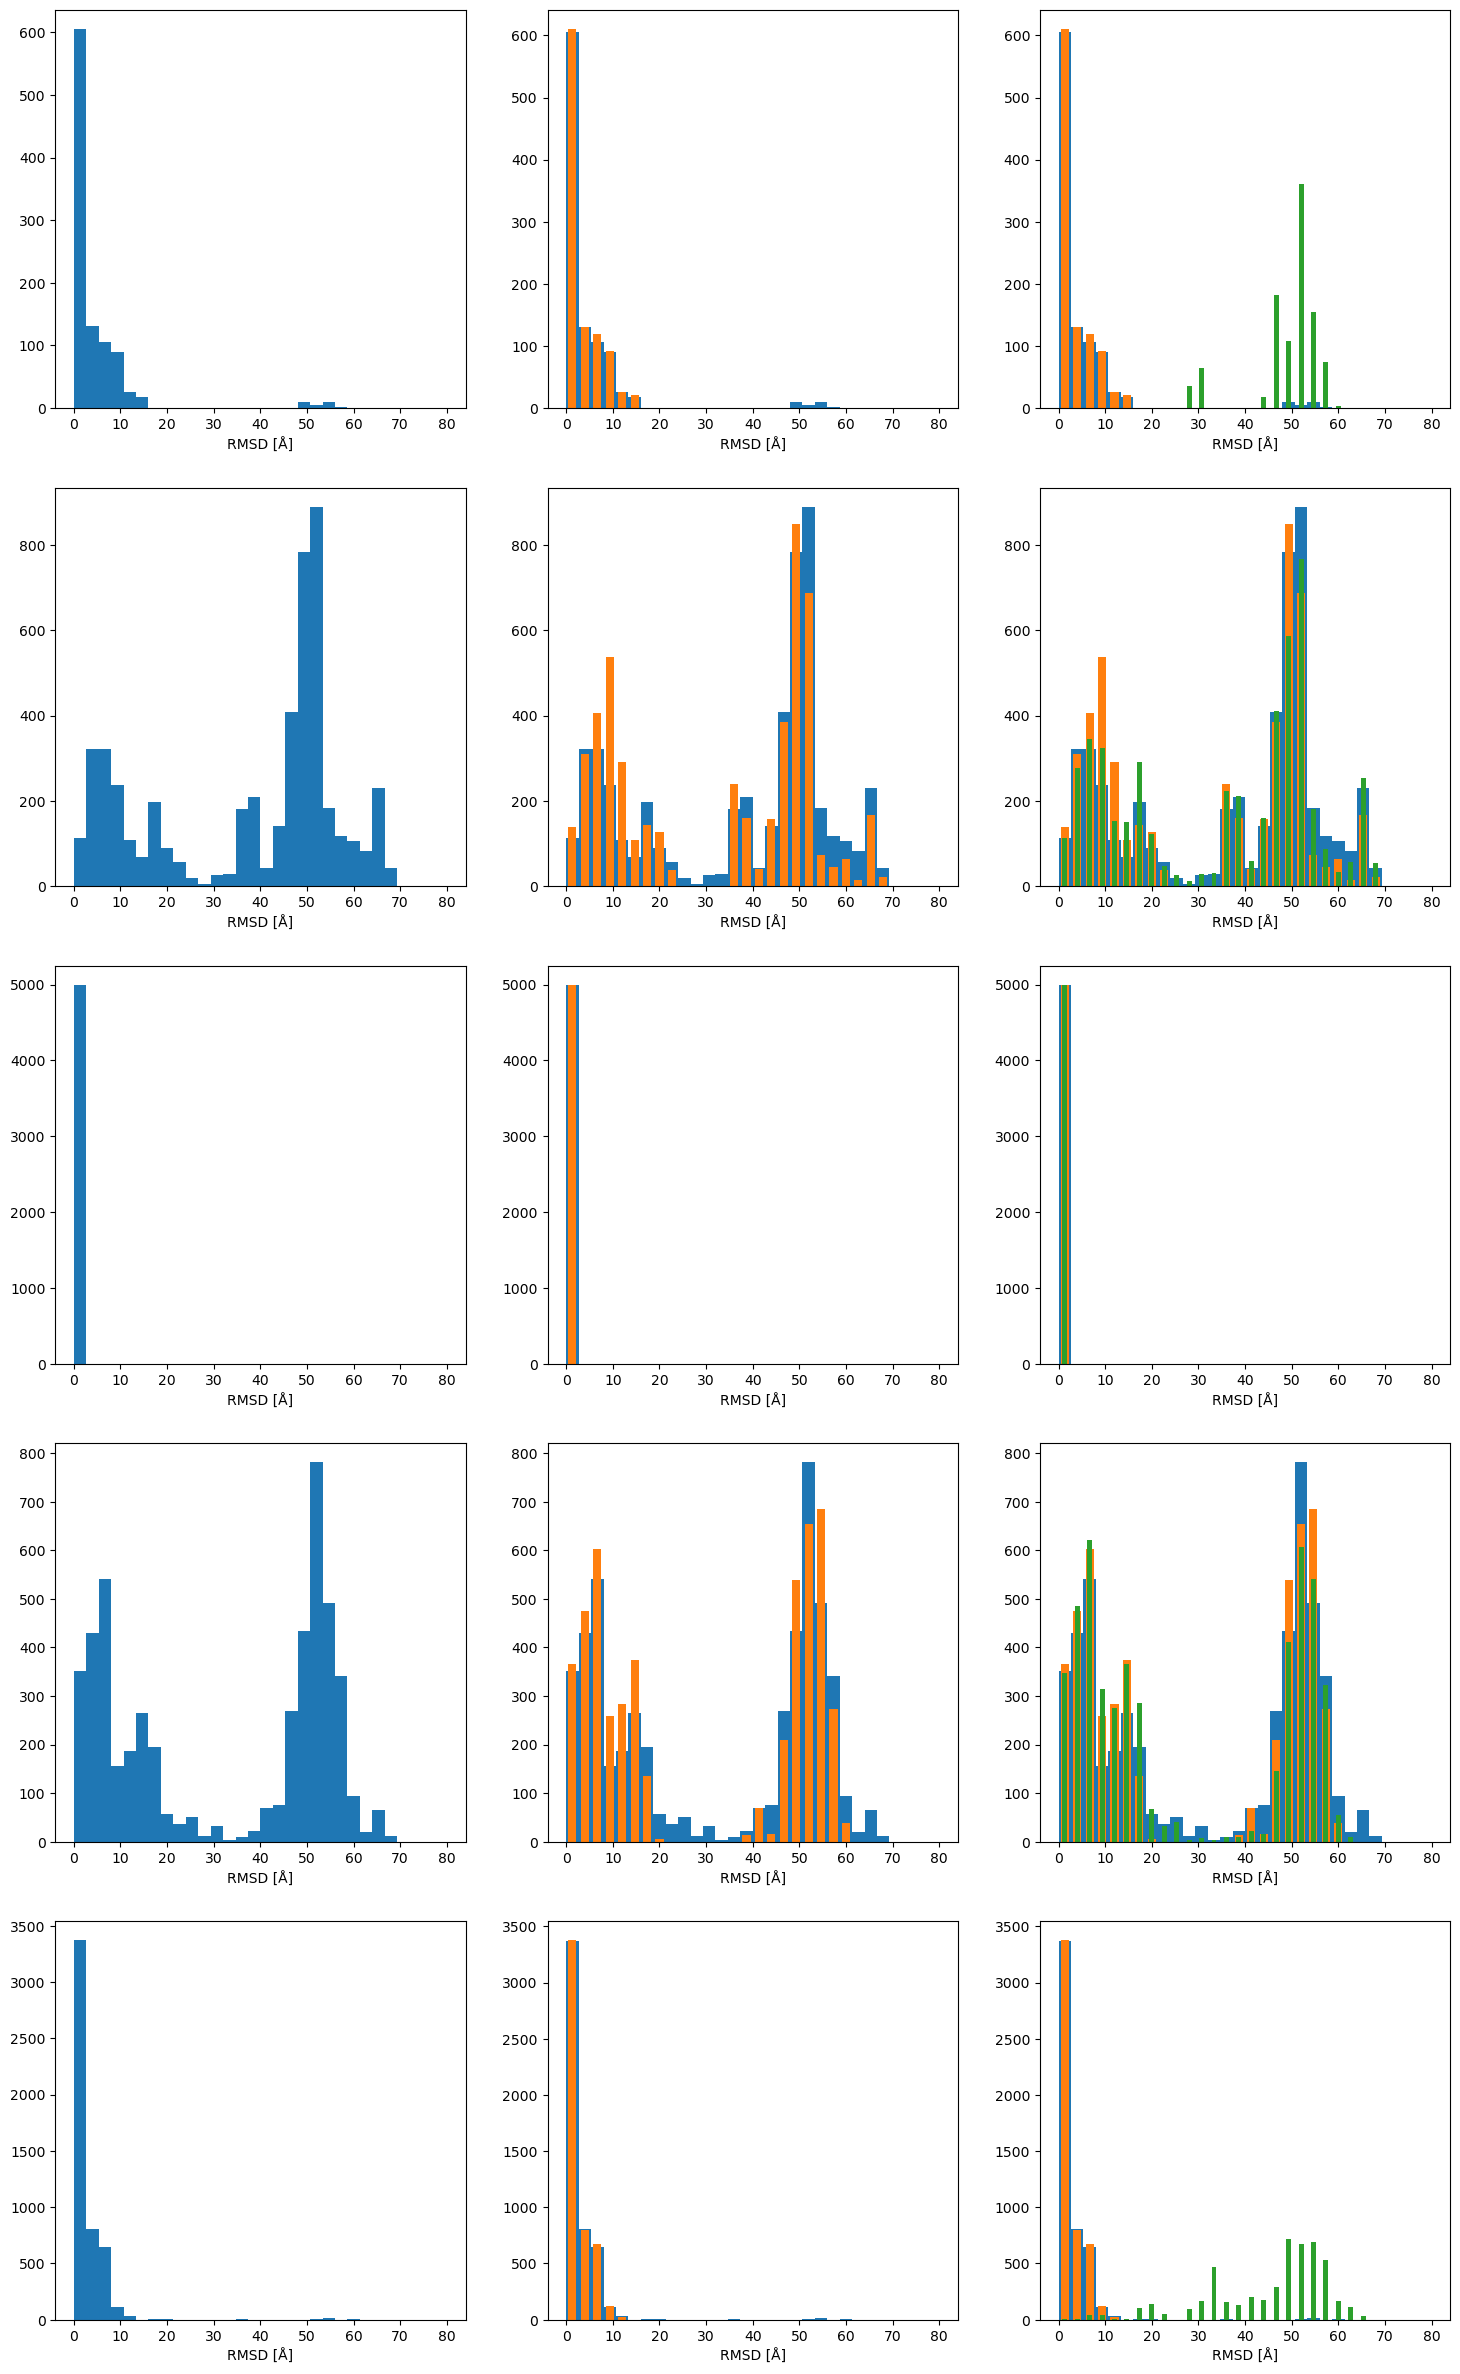

In [5]:
fig, axes = subplots(5, 3, figsize=(18,30))
x_min = 0
x_max = 80
for i in 1:size(test_radii, 1)
    axes[i, 1].hist(reshape(r_is[i], (size(r_is[i], 1) * size(r_is[i], 2), 1)), bins=30, range=(x_min, x_max), rwidth=1)
    axes[i, 2].hist(reshape(r_is[i], (size(r_is[i], 1) * size(r_is[i], 2), 1)), bins=30, range=(x_min, x_max), rwidth=1)
    axes[i, 3].hist(reshape(r_is[i], (size(r_is[i], 1) * size(r_is[i], 2), 1)), bins=30, range=(x_min, x_max), rwidth=1)
    axes[i, 2].hist(reshape(r_os[i], (size(r_os[i], 1) * size(r_is[i], 2), 1)), bins=30, range=(x_min, x_max), rwidth=0.65)
    axes[i, 3].hist(reshape(r_os[i], (size(r_os[i], 1) * size(r_is[i], 2), 1)), bins=30, range=(x_min, x_max), rwidth=0.65)
    axes[i, 3].hist(reshape(r_2s[i], (size(r_2s[i], 1) * size(r_is[i], 2), 1)), bins=30, range=(x_min, x_max), rwidth=0.4)
    # axes[i, 1].set_yscale('log')
    # axes[i, 2].set_yscale('log')
    # axes[i, 3].set_yscale('log')
    # axes[i].set_aspect(:equal)
    for j in 1:3
        # axes[i, j].set_title(titles[i])
        axes[i, j].set_xlabel("RMSD [Å]")
    end
end

savefig("01_plots_rmsds.png", dpi=200)